In [37]:
#install python packages, numpy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data file is not included in the repo (GitHub 100MB limit).
# Download from: https://data.ca.gov/dataset/covid-19-skilled-nursing-facility-data
# Then save as: data/Skilled_Nursing_Facilities_Covid-19.csv

try:
    covid = pd.read_csv("data/Skilled_Nursing_Facilities_Covid-19.csv")
    print("Loaded dataset:", covid.shape)
except FileNotFoundError:
    raise FileNotFoundError(
        "Missing data file. Download the CSV from the California Open Data Portal and "
        "place it at: data/Skilled_Nursing_Facilities_Covid-19.csv"
    )

FileNotFoundError: Missing data file. Download the CSV from the California Open Data Portal and place it at: data/Skilled_Nursing_Facilities_Covid-19.csv

In [4]:
#performing some exploratory analysis
#observing the first five rows of the covid dataset
#noticed various NaN values
covid.head()

,_id,county,facility_id,facility_name,as_of_date,total_resident_cases,new_resident_cases,total_resident_deaths,total_health_care_worker_cases,new_health_care_worker_cases,total_health_care_workers_deaths,note
0,1,Orange,60000196,"Anaheim Healthcare Center, Llc",2023-01-09,346.0,0.0,39.0,348.0,0.0,0.0,NaN
1,2,Monterey,70000034,Carmel Valley Manor,2023-01-09,12.0,0.0,NaN,21.0,0.0,0.0,c
2,3,Napa,110000760,The Meadows Of Napa Valley Care Center,2023-01-09,40.0,0.0,0.0,67.0,0.0,0.0,NaN
3,4,Contra Costa,140000082,Windsor Rosewood Care Center,2023-01-09,25.0,0.0,NaN,45.0,0.0,NaN,c f
4,5,San Francisco,220000082,City View Post Acute,2023-01-09,190.0,0.0,NaN,157.0,0.0,0.0,c


In [5]:
#observing the last 5 observations to look for any inconsistencies
#noticed various NaN values
covid.tail()

,_id,county,facility_id,facility_name,as_of_date,total_resident_cases,new_resident_cases,total_resident_deaths,total_health_care_worker_cases,new_health_care_worker_cases,total_health_care_workers_deaths,note
1362240,1362241,San Luis Obispo,50000003,Arroyo Grande Care Center,2021-12-02,73.0,0.0,NaN,49.0,0.0,0.0,c
1362241,1362242,Santa Barbara,50000061,Samarkand Skilled Nursing Facility,2021-12-02,NaN,0.0,NaN,33.0,0.0,NaN,a c f
1362242,1362243,Ventura,50000066,Coastal View Healthcare Center,2021-12-02,36.0,0.0,NaN,41.0,0.0,0.0,c
1362243,1362244,Ventura,50000248,St. John's Hospital Camarillo D/P Snf,2021-12-02,NaN,0.0,0.0,59.0,0.0,0.0,a
1362244,1362245,San Diego,80000642,Remington Club Health Center,2021-12-02,NaN,0.0,NaN,22.0,0.0,0.0,a c


In [6]:
#searching for the length of the dataset, dataset is 1362245 rows, assigned to covid_length
covid_length = len(covid)
print(covid_length)

#i want to verify the length of the rows, going to use the shape function
print(covid.shape)

1362245
(1362245, 12)


In [7]:
#looking for the datatypes for all variables in the dataset. want to know what data I work with or
#if anything must be converted.
covid.dtypes

_id                                   int64
county                               object
facility_id                           int64
facility_name                        object
as_of_date                           object
total_resident_cases                float64
new_resident_cases                  float64
total_resident_deaths               float64
total_health_care_worker_cases      float64
new_health_care_worker_cases        float64
total_health_care_workers_deaths    float64
note                                 object
dtype: object

In [8]:
#used describe on df to get a look at some trends, some surprising trends I see are 707219.00 resident deaths and 0 health care worker deaths... This seems surprising, will need to look further into this
covid.describe()


,_id,facility_id,total_resident_cases,new_resident_cases,total_resident_deaths,total_health_care_worker_cases,new_health_care_worker_cases,total_health_care_workers_deaths
count,1.362245e+06,1.362245e+06,1.147588e+06,1.313497e+06,707219.000000,1.160152e+06,1.286149e+06,1174429.0
mean,6.811230e+05,3.790686e+08,6.904681e+01,2.181048e-02,8.996657,6.200313e+01,3.615444e-03,0.0
std,3.932464e+05,3.892329e+08,5.863146e+01,6.743498e-01,11.337467,5.277007e+01,2.449018e-01,0.0
min,1.000000e+00,1.000000e+07,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
25%,3.405620e+05,6.000106e+07,2.800000e+01,0.000000e+00,0.000000,2.800000e+01,0.000000e+00,0.0
50%,6.811230e+05,2.200000e+08,5.700000e+01,0.000000e+00,0.000000,5.000000e+01,0.000000e+00,0.0
75%,1.021684e+06,9.200000e+08,9.600000e+01,0.000000e+00,16.000000,8.200000e+01,0.000000e+00,0.0
max,1.362245e+06,9.700002e+08,5.030000e+02,8.600000e+01,115.000000,1.325000e+03,6.100000e+01,0.0


In [9]:
#got column names for reference
covid.columns

Index(['_id', 'county', 'facility_id', 'facility_name', 'as_of_date',
       'total_resident_cases', 'new_resident_cases', 'total_resident_deaths',
       'total_health_care_worker_cases', 'new_health_care_worker_cases',
       'total_health_care_workers_deaths', 'note'],
      dtype='object')

In [10]:
#wanted to confirm the datatype of the as_of_date column.  
covid['as_of_date'].dtype
#changing the as of date column from object to datetime
covid["as_of_date"] = pd.to_datetime(
    covid["as_of_date"], errors="coerce")

In [11]:
#double-checking the dtype of as_of_date
covid['as_of_date'].dtype
covid['as_of_date'].head()

0   2023-01-09
1   2023-01-09
2   2023-01-09
3   2023-01-09
4   2023-01-09
Name: as_of_date, dtype: datetime64[ns]

In [12]:
#i want to examine data specifically for San Francisco County, I will filter by San Francisco, and name the variable sf for convenience
sf = covid[covid['county'] == 'San Francisco']
#sf
# i will sort the dataset by ascending dates to get dates in order
sf_sort = sf.sort_values(by = 'as_of_date', ascending = True)
sf_sort

,_id,county,facility_id,facility_name,as_of_date,total_resident_cases,new_resident_cases,total_resident_deaths,total_health_care_worker_cases,new_health_care_worker_cases,total_health_care_workers_deaths,note
362904,362905,San Francisco,220000888,San Francisco General Hospital D/P Snf,2020-05-15,NaN,NaN,0.0,0.0,NaN,0.0,a b e
213265,213266,San Francisco,220000082,City View Post Acute,2020-05-15,0.0,NaN,0.0,NaN,NaN,0.0,b d e
1022961,1022962,San Francisco,220000048,San Francisco Post Acute,2020-05-15,0.0,NaN,0.0,0.0,NaN,0.0,b e
533259,533260,San Francisco,220000512,Laguna Honda Hospital & Rehabilitation Ctr D/P...,2020-05-15,NaN,NaN,0.0,18.0,NaN,0.0,a b e
533233,533234,San Francisco,220000971,San Francisco Towers,2020-05-15,NaN,NaN,NaN,NaN,NaN,0.0,a b c d e
...,...,...,...,...,...,...,...,...,...,...,...,...
253908,253909,San Francisco,220000086,Sheffield Convalescent Hospital,2023-05-31,NaN,0.0,0.0,NaN,0.0,0.0,a d
850938,850939,San Francisco,220000067,Laurel Heights Community Care,2023-05-31,NaN,0.0,0.0,0.0,0.0,0.0,a
317956,317957,San Francisco,220000060,The Avenues Transitional Care Center,2023-05-31,249.0,0.0,NaN,143.0,0.0,0.0,c
1317548,1317549,San Francisco,220000888,San Francisco General Hospital D/P Snf,2023-05-31,21.0,0.0,0.0,70.0,0.0,0.0,NaN


In [13]:
#filtered data down to a single facility to get more of an idea of how data works.  
towers = sf_sort[sf_sort['facility_name'] == 'San Francisco Towers']
towers

,_id,county,facility_id,facility_name,as_of_date,total_resident_cases,new_resident_cases,total_resident_deaths,total_health_care_worker_cases,new_health_care_worker_cases,total_health_care_workers_deaths,note
533233,533234,San Francisco,220000971,San Francisco Towers,2020-05-15,NaN,NaN,NaN,NaN,NaN,0.0,a b c d e
1277263,1277264,San Francisco,220000971,San Francisco Towers,2020-05-16,NaN,0.0,NaN,NaN,0.0,0.0,a c d
277637,277638,San Francisco,220000971,San Francisco Towers,2020-05-17,NaN,0.0,NaN,NaN,0.0,0.0,a c d
1001975,1001976,San Francisco,220000971,San Francisco Towers,2020-05-18,NaN,0.0,NaN,NaN,0.0,0.0,a c d
917210,917211,San Francisco,220000971,San Francisco Towers,2020-05-19,NaN,0.0,NaN,NaN,0.0,0.0,a c d
...,...,...,...,...,...,...,...,...,...,...,...,...
999531,999532,San Francisco,220000971,San Francisco Towers,2023-05-27,15.0,0.0,NaN,37.0,0.0,0.0,c
808024,808025,San Francisco,220000971,San Francisco Towers,2023-05-28,15.0,0.0,NaN,37.0,0.0,0.0,c
573531,573532,San Francisco,220000971,San Francisco Towers,2023-05-29,15.0,0.0,NaN,37.0,0.0,0.0,c
679856,679857,San Francisco,220000971,San Francisco Towers,2023-05-30,15.0,0.0,NaN,37.0,0.0,0.0,c


In [14]:
#find the count of null values in each variable
towers.isna().sum().sort_values(ascending=False).head(20)

total_resident_deaths               1112
total_resident_cases                 456
total_health_care_worker_cases       217
new_health_care_worker_cases          28
new_resident_cases                    10
_id                                    0
county                                 0
facility_id                            0
facility_name                          0
as_of_date                             0
total_health_care_workers_deaths       0
note                                   0
dtype: int64

In [15]:
#double-checking that the above code is right, checking 'total_resident_deaths'
towers['total_resident_deaths'].isna().sum()

np.int64(1112)

In [16]:
#find out the maximum number of total resident cases
sf.groupby('facility_name')['total_resident_cases'].max()

facility_name
California Pacific Medical Center - Davies Campus Hospital D/P Snf     14.0
Central Gardens Post Acute                                            140.0
City View Post Acute                                                  227.0
Hayes Convalescent Hospital                                             0.0
Heritage On The Marina                                                  NaN
Jewish Home & Rehab Center D/P Snf                                    260.0
Laguna Honda Hospital & Rehabilitation Ctr D/P Snf                    469.0
Laurel Heights Community Care                                          29.0
Lawton Skilled Nursing & Rehabilitation Center                         26.0
Pacific Heights Transitional Care Center                               80.0
San Francisco General Hospital D/P Snf                                 21.0
San Francisco Health Care                                             198.0
San Francisco Post Acute                                               48.

In [17]:
# sort facility name and max covid cases descending order
sf_res_tot = sf.groupby('facility_name')['total_resident_cases'].max().sort_values(ascending = False)
sf_res_tot
#below we can see that the facility with the highest ammount of resident covid cases are Lagunda Honda Hospital & Rehabilitation
#Lagunda Honda also had the most worker cases and has double that of the next highest facility.  This would be interesting to look further into.

facility_name
Laguna Honda Hospital & Rehabilitation Ctr D/P Snf                    469.0
Jewish Home & Rehab Center D/P Snf                                    260.0
The Avenues Transitional Care Center                                  249.0
City View Post Acute                                                  227.0
Victorian Post Acute                                                  198.0
San Francisco Health Care                                             198.0
Central Gardens Post Acute                                            140.0
Pacific Heights Transitional Care Center                               80.0
San Francisco Post Acute                                               48.0
Laurel Heights Community Care                                          29.0
Lawton Skilled Nursing & Rehabilitation Center                         26.0
St. Anne's Home                                                        22.0
San Francisco General Hospital D/P Snf                                 21.

In [18]:
#look for total resident deaths due to covid and sort values descending
sf_res_deaths = sf.groupby('facility_name')['total_resident_deaths'].max().sort_values(ascending = False)
sf_res_deaths
#total reported resident deaths due to covid 19 were lower than I thought, with only 3 facilities reporting deaths over 3 years
#this would be interesting to look further into, there are also NaN values under San Francisco Towers so this will need further cleaning

facility_name
Laguna Honda Hospital & Rehabilitation Ctr D/P Snf                    16.0
Victorian Post Acute                                                  15.0
Central Gardens Post Acute                                            11.0
San Francisco General Hospital D/P Snf                                 0.0
The Avenues Transitional Care Center                                   0.0
St. Anne's Home                                                        0.0
Sheffield Convalescent Hospital                                        0.0
Sequioas San Francisco Convalescent Hospital                           0.0
San Francisco Post Acute                                               0.0
San Francisco Health Care                                              0.0
California Pacific Medical Center - Davies Campus Hospital D/P Snf     0.0
Lawton Skilled Nursing & Rehabilitation Center                         0.0
Laurel Heights Community Care                                          0.0
Jewish Home

In [19]:
#look for total worker covid cases and sort results descending order
sf_worker_tot = sf.groupby('facility_name')['total_health_care_worker_cases'].max().sort_values(ascending = False)
sf_worker_tot
#below, we can see that the facility with the most health care worker covid cases was Laguna Honda Hospital & Rehabilitation
#1325 appears to be an outlier and this probably would need to be looked into further in order to verify, particularly because the
#next highest ammount is over 1000 cases fewer.

facility_name
Laguna Honda Hospital & Rehabilitation Ctr D/P Snf                    1325.0
City View Post Acute                                                   175.0
Jewish Home & Rehab Center D/P Snf                                     161.0
The Avenues Transitional Care Center                                   143.0
Central Gardens Post Acute                                             116.0
San Francisco Health Care                                              105.0
Victorian Post Acute                                                    78.0
San Francisco General Hospital D/P Snf                                  70.0
Pacific Heights Transitional Care Center                                63.0
San Francisco Post Acute                                                51.0
San Francisco Towers                                                    37.0
St. Anne's Home                                                         36.0
California Pacific Medical Center - Davies Campus Hospital D/P

In [20]:
#look for total health care worker deaths due to covid and sort descending.  
sf_worker_deaths = sf.groupby('facility_name')['total_health_care_workers_deaths'].max().sort_values(ascending = False)
sf_worker_deaths
#below, we can see that no reported worker deaths in the City of San Francisco has been reported as being due to covid 19

facility_name
California Pacific Medical Center - Davies Campus Hospital D/P Snf    0.0
San Francisco General Hospital D/P Snf                                0.0
The Avenues Transitional Care Center                                  0.0
St. Anne's Home                                                       0.0
Sheffield Convalescent Hospital                                       0.0
Sequioas San Francisco Convalescent Hospital                          0.0
San Francisco Towers                                                  0.0
San Francisco Post Acute                                              0.0
San Francisco Health Care                                             0.0
Pacific Heights Transitional Care Center                              0.0
Central Gardens Post Acute                                            0.0
Lawton Skilled Nursing & Rehabilitation Center                        0.0
Laurel Heights Community Care                                         0.0
Laguna Honda Hospital & 

In [21]:
#as a comparison to the above results for SF health care worker covid deaths, I wanted to run the same code for the entire dataset to see how this compares since this is surprising
sf_worker_deaths_tot = covid.groupby('facility_name')['total_health_care_workers_deaths'].max().sort_values(ascending = False)
sf_worker_deaths_tot
#while there are NaN values, the highest reported death count for health care workers who contracted covid 19 is zero, which matches the previous analysis

facility_name
A Grace Sub Acute & Skilled Care                          0.0
Providence Little Company Of Mary Subacute Care Center    0.0
Redwood Cove Healthcare Center                            0.0
Redwood Convalescent Hospital, Inc.                       0.0
Redlands Healthcare Center                                0.0
                                                         ... 
The Hills Healthcare Center                               NaN
The Meadows Post Acute                                    NaN
Torrance Care Center West, Inc.                           NaN
Usc Verdugo Hills Hospital D/P Snf                        NaN
Western Convalescent Hospital                             NaN
Name: total_health_care_workers_deaths, Length: 1214, dtype: float64

In [22]:
#the above results are interesting to look further into, I'm going to plot them on some scatter plots and histograms to look at some relationships that we wouldn't notice just looking at the data

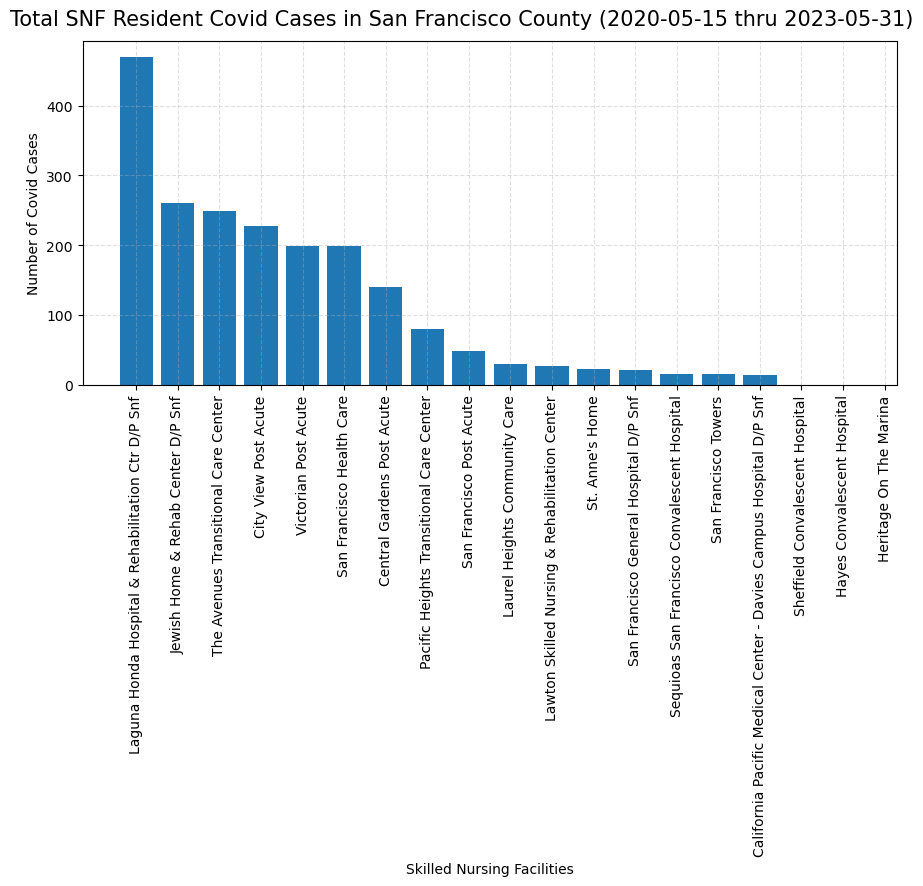

In [23]:
#I'm going to make a Bar Graph of total resident covid cases in Skilled nursing facilities for San Francisco County only.
#I want to amke a bar graph with facility names on the x-axis and total resident cases on the y axis
fig, ax = plt.subplots(figsize = (9,9))

ax.bar(sf_res_tot.index, sf_res_tot.values)
ax.grid(True, ls = '--', alpha = .4)

ax.set(xlabel = 'Skilled Nursing Facilities', ylabel = 'Number of Covid Cases')
plt.suptitle('Total SNF Resident Covid Cases in San Francisco County (2020-05-15 thru 2023-05-31)', fontsize = 15)

plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

#The resulting plot shows a graph with a heavy right-skew due to Laguna Honda having such high case numbers.  

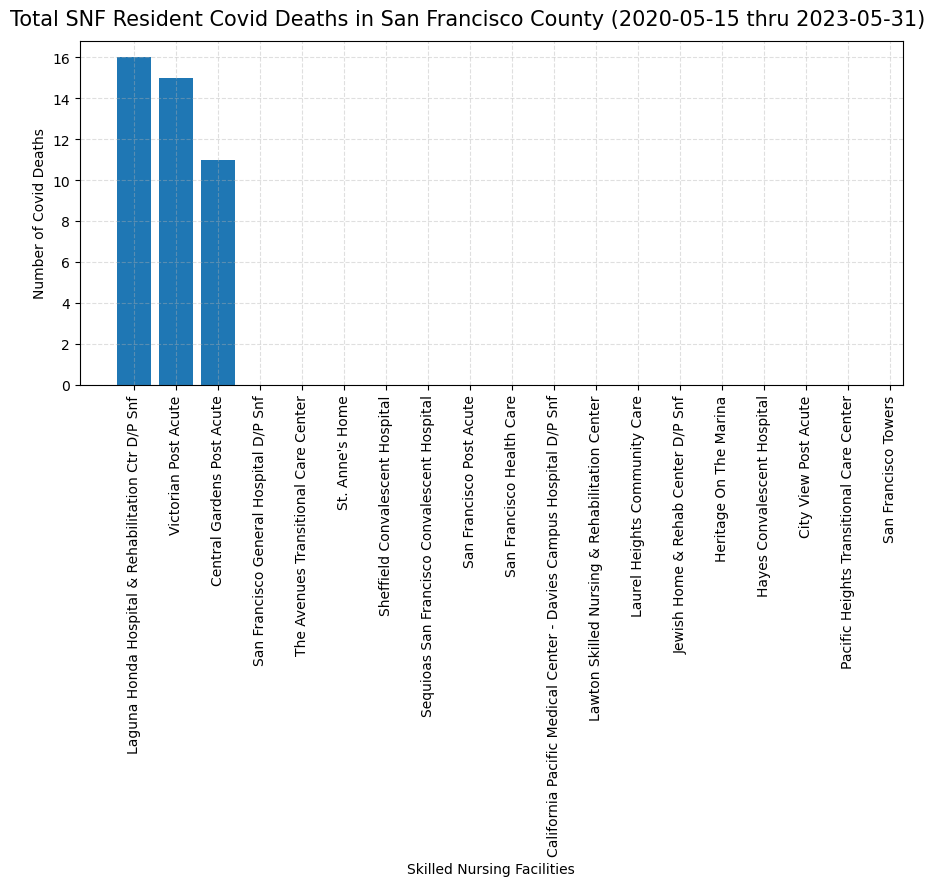

np.float64(0.7894736842105263)

In [24]:
#I'm going to plot the same for total Resident Deaths in San Francisco County with a bar chart
fig, ax = plt.subplots(figsize = (9,9))

ax.bar(sf_res_deaths.index, sf_res_deaths.values)
ax.grid(True, ls = '--', alpha = .4)

ax.set(xlabel = 'Skilled Nursing Facilities', ylabel = 'Number of Covid Deaths')
plt.suptitle('Total SNF Resident Covid Deaths in San Francisco County (2020-05-15 thru 2023-05-31)', fontsize = 15)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#While there were high cummulative COVID-19 cases reported across Skilled Nursing Facilities in the County of San Francisco,
#Reported Deaths were very low in comparison to the higher reported covid cases as seen above.
#This phenomenon could be due to the limitations of the data provided, but its hard to say.  On one hand, low mortality
#could be due to resources of each SNF such as nursing staff and access to medical equipment.  On the other hand, there 
#could have been under reporting due to privacy laws, underrepporting or missing data. 

#The proportion of facilities that reported 0 maximum resident deaths
(sf_res_deaths == 0).mean() #Approximately 79% of facilties in SF County reported 0 deaths, but should be interpreted with caution given the limitations of the data

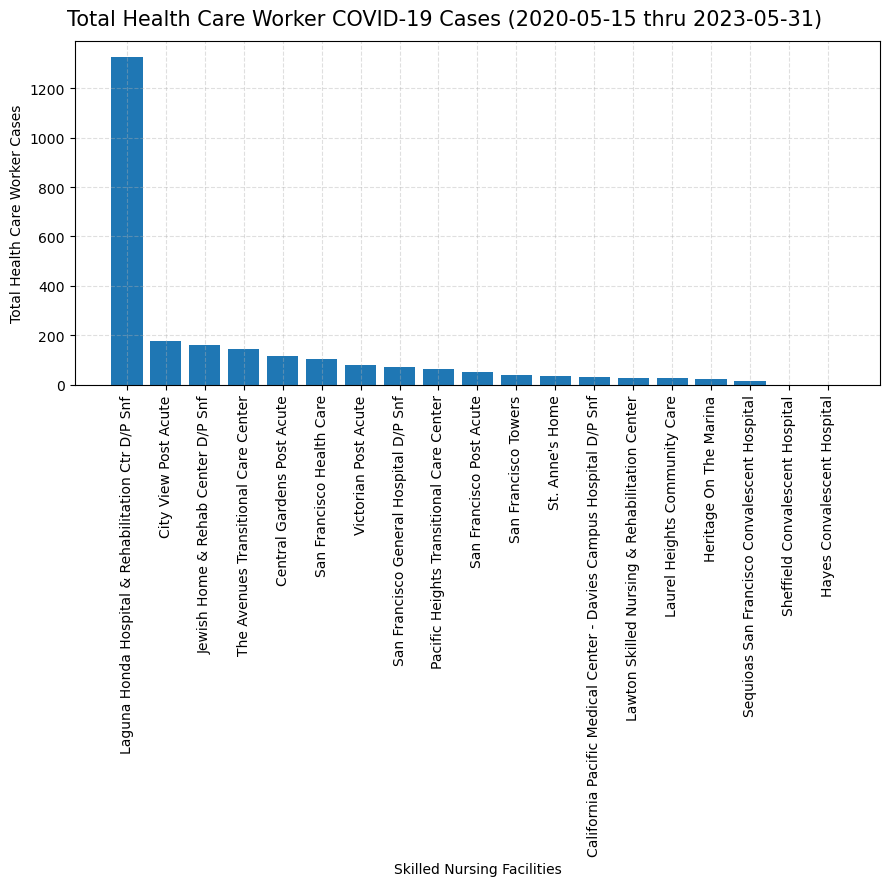

In [25]:
#Now I will examine the total health care worker COVID cases for San Francisco County

fig, ax = plt.subplots( figsize = (9,9))

ax.bar(sf_worker_tot.index, sf_worker_tot.values)
ax.grid(True, ls = '--', alpha = .4)

ax.set(xlabel = 'Skilled Nursing Facilities', ylabel = 'Total Health Care Worker Cases')
plt.suptitle('Total Health Care Worker COVID-19 Cases (2020-05-15 thru 2023-05-31)', fontsize = 15)

plt.xticks(rotation = 90)
plt.tight_layout()

plt.show()

#Health Care Worker COVID-19 cases are highly right-skewed across San Francisco County Skilled Nursing Facilities.
#Laguna Hostpital & Rehabilitation reports far more cases than all other facilities which could be due to various factors such as:
#difference in facility sizes, different visitation policies, possible prolonged outbreak.  In order to facilitate 
#comparisions across the rest of the facilities, the following plot will exclude Laguna Honda.

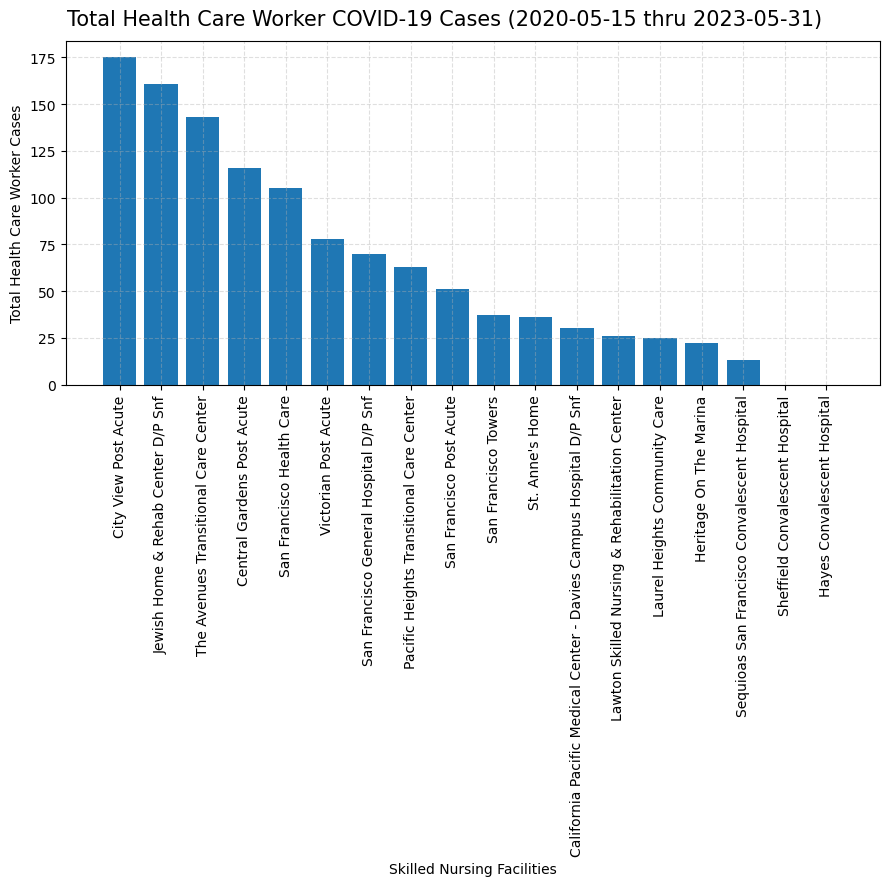

In [26]:
fig, ax = plt.subplots( figsize = (9,9))

ax.bar(sf_worker_tot.index[1:], sf_worker_tot.values[1:]) #Used slicing to remove Laguna Honda 
ax.grid(True, ls = '--', alpha = .4)

ax.set(xlabel = 'Skilled Nursing Facilities', ylabel = 'Total Health Care Worker Cases')
plt.suptitle('Total Health Care Worker COVID-19 Cases (2020-05-15 thru 2023-05-31)', fontsize = 15)

plt.xticks(rotation = 90)
plt.tight_layout()

plt.show()

#I used slicing to remove Laguna Honda (outlier) in order to better compare the remaining facility cases.
#I tested the slicing approach before committing to the graph. 
#I could have created a copy of sf_worker_tot and used the .drop function as well but chose for the simple approach
#Plotted to verify intended facility was removed.
#Data are still right-skewed, but values are less-extreme after removing the outlier


In [27]:
#Total reported health care worker deaths due to COVID-19 are uniformly zero at the Facility Level in San Francisco County.  
#This does not necessarily mean that there were an absence of deaths.  I would interpret this with caution due to 
#limitations in the data.
#Next, Scatterplots will be used to examine relationships between resident and health care worker case counts across facilities.

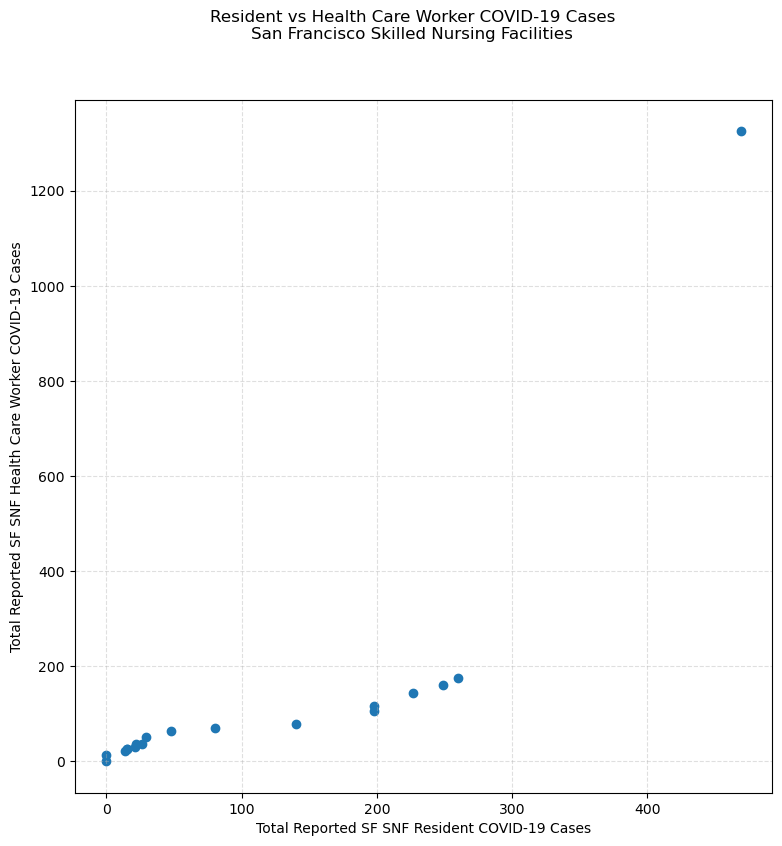

In [28]:
#This plot included to observe Laguna Honda as an outlier in comparison with the other datasets.  
#It is surprising that worker cases are 3x higher than resident cases.  To see the relationship
#easier for the rest of the facilities, I will exclude Laguna Honda and recreate the below scatterplot.
fig, ax = plt.subplots(figsize = (9,9))
ax.scatter(sf_res_tot, sf_worker_tot)

ax.set(xlabel = 'Total Reported SF SNF Resident COVID-19 Cases', 
       ylabel = 'Total Reported SF SNF Health Care Worker COVID-19 Cases')

plt.suptitle('Resident vs Health Care Worker COVID-19 Cases\n' 'San Francisco Skilled Nursing Facilities')
ax.grid(True, ls = '--', alpha = .4)


plt.show()

In [29]:
#In preparation for the below scatterplot, the correlation coefficient will be calcluated for relationship plotted...
np.corrcoef(sf_res_tot.values[1:], sf_worker_tot.values[1:])

array([[nan, nan],
       [nan,  1.]])

In [30]:
#In order to obtain a correlation coefficient, we will need to clean the data, and then re-create the
#plots.
sf_clean = sf.copy() #create a copy of the data frame

#chose columns that I wished to keep, and assigned them to the previously made variable
sf_clean = sf_clean[['facility_name', 'total_resident_cases', 'total_health_care_worker_cases']]

#assign to sf_clean_facilities the max reported per facility since numbers are cummulative in the data
sf_clean_facilities = (sf_clean.groupby('facility_name')[['total_resident_cases', 'total_health_care_worker_cases']].max())

#Drop Rows with missing values
sf_clean_facilities = sf_clean_facilities.dropna()

#sort values descending
sf_clean_facilities = sf_clean_facilities.sort_values('total_resident_cases', ascending = False)

#remove dominant outlier. I sorted in descending order so the outlier would be correctly removed
sf_clean_facilities = sf_clean_facilities.iloc[1:]
sf_clean_facilities


,total_resident_cases,total_health_care_worker_cases
facility_name,,
Jewish Home & Rehab Center D/P Snf,260.0,161.0
The Avenues Transitional Care Center,249.0,143.0
City View Post Acute,227.0,175.0
Victorian Post Acute,198.0,78.0
San Francisco Health Care,198.0,105.0
Central Gardens Post Acute,140.0,116.0
Pacific Heights Transitional Care Center,80.0,63.0
San Francisco Post Acute,48.0,51.0
Laurel Heights Community Care,29.0,25.0


In [31]:
#we will now obtain the correlation coefficient with the cleaned data

#assign sf resident totals to a variable from cleaned data
res_tot_clean = sf_clean_facilities['total_resident_cases']

#assign sf HC worker totals
worker_tot_clean = sf_clean_facilities['total_health_care_worker_cases']

#tested both variables before performing correlation calcualtion
#print(res_tot_clean)
#print(worker_tot_clean)

#Calculate correlation coefficient
np.corrcoef(res_tot_clean, worker_tot_clean)
#r is reported to be approximately r = 0.924, which indicates a strong positive linear association
#This implies that facilities with higher resident cases tend to have higher worker cases reported
#This can be seen with the upward sloping pattern in the next plot.
#This does not imply causiation regardless of directionality.

array([[1.        , 0.92416172],
       [0.92416172, 1.        ]])

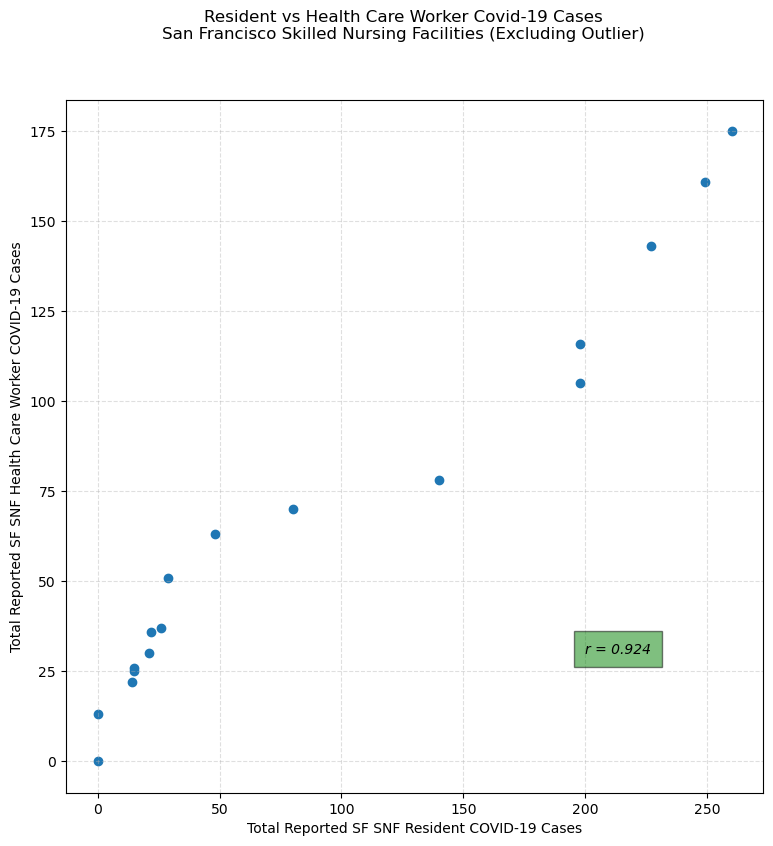

In [32]:
#Upon removing the dominant outlier, we can see a strong positive correlation between worker cases
#and resident cases.  It should be noted that this does not imply causation in either direction and 
#should be interpreted with caution given the noted limitations in our data.
#This relationship suggests shared exposure and possible transmission between groups, but causality cannot be inferred given
#limitations of our data.
fig, ax = plt.subplots(figsize = (9,9))
ax.scatter(sf_res_tot.values[1:], sf_worker_tot.values[1:])

ax.set(xlabel = 'Total Reported SF SNF Resident COVID-19 Cases', 
       ylabel = 'Total Reported SF SNF Health Care Worker COVID-19 Cases')

plt.suptitle('Resident vs Health Care Worker Covid-19 Cases\n' 'San Francisco Skilled Nursing Facilities (Excluding Outlier)')
ax.grid(True, ls = '--', alpha = .4)

ax.text(200, 30, 'r = 0.924', style = 'italic',
        bbox = {'facecolor': 'green', 'alpha': .5, 'pad' : 8})

plt.show()

In [33]:
#Hypothesis tests will not be conducted here because the facility-level data are highly skewed and 
#contain substantial NaN values, and do not define comparison groups.  In consideration of this, 
#analysis focuses on descriptive statistics, visualization and correlation to explore relationships while
#avoiding unsupported inferential claims.

## Key Findings

-Skilled Nursing Facility (SNF) COVID-19 case counts in San Francisco County show a heavy right-skew, driven primarily by Laguna
Honda Hospital & Rehabilitation Center, which reports significantly higher resident and health care worker case counts in comparison to other facilities in the county.

-Reported resident COVID-19 deaths at the facility level are quite low, with approximately 79% of facilities reporting 0 cumulative deaths over the reported period.  Due to high zero values, NaN values and plausible underreporting, death-based analyses were only analyzed with descriptive statistics.

-After cleaning the data, removing facilities with missing cummulative values, and excluding Laguna Honda (dominant outlier), a strong positive linear association (r = 0.92) was observed between total resident COVID-19 cases and total health care worker COVID-19 cases.

-This association suggests that shared exposure or possible outbreaks within facilities.  However, correlation does not imply causation and causal conclusions can't be drawn from this analysis.

## Limitations and Future Work
-This analysis has several limitations.  Facility-level COVID-19 death data appears to be scarce and may be underreported, possibly due to privacy laws or reporting practices.  

-The analysis is also observational and descriptive in nature.  Formal hypothesis testing was not conducted because of heavily skewed distributions, missing data and absence of clearly defined comparison groups.

-Future analysis comparing San Francisco County with other Counties in California may give extra insight to the relationship between resident and health care worker COVID-19 infections.  Additionally, data which integrates facility-level characteristics such as bed count, staffing levels, visitation policies could add important context to observed differences across facilities.